In [1]:
import os 
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ'

In [2]:
os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
!pip install researchpy
import researchpy as rp

# Verisetine İlk Bakışı Atmamızı Sağlayacak Olan Class

In [28]:
class Information():
    def __init__(self,data):
        self.data = data
        
    
    def info(self):
        print(data.info())
        
    
    def copy(self):
        data1 = data.copy()
        data2 = data.copy()
    
    def describe(self):
        
        
        print("**********************************")
        print(" Loan Değişkeninin incelenmesi")
        print("Ortalama: " + str(data["loan"].mean()))
        print("Dolu Gözlem Sayısı: " + str(data["loan"].count())) 
        print("Maksimum Değer: " + str(data["loan"].max()))
        print("Minimum Değer: " + str(data["loan"].min()))
        print("Medyan: " + str(data["loan"].median()))
        print("Standart Sapma: " + str(data["loan"].std()))
        
        return data.describe()
        
    def shape(self):
        
        #type(data)
        print(data.axes)
        #print(self.data.axes)
        #print(" ndim = " + str(data.ndim))
        print(" Veri şekli = " + str(data.shape))
        print(" Veri büyüklüğü = " + str(data.size))
        #type(data.values)
    
    def head(self,row = None):
        
        return data.head(5)
        # print(data.tail(3))
        
    def hedef_degisken(self):
        
        countNo = len(data[data.bad == 0])
        countYes = len(data[data.bad == 1])
        print("Risk barındırmayan müşterilerin yüzdesi : {:.2f}%".format((countNo / (len(data.bad))*100)))
        print("Risk barındıran müşterilerin yüzdesi : {:.2f}%".format((countYes / (len(data.bad))*100)))
        
        print("************************************")
        
        print(data.groupby('bad').mean().T)

# VERİ GÖRSELLEŞTİRME

### Bu class içerisinde incelemek istediğimiz değişkenleri görselleştirerek daha yakından tanıma fırsatı buluyoruz.

In [6]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def visual(self):
        data["job"].value_counts().plot.barh().set_title("Job Değişkeninin Sınıf Frekansları");
    
    def countplot(self):
        sns.countplot(x="bad", data=data, palette="bwr")
        plt.show()
        
    def figure(self):
        fig, ax = plt.subplots(1, 2, figsize = (18, 8))
        sns.barplot(x = "job", y = "loan", hue = "bad", data = data, ax = ax[0])
        ax[0].set_ylabel("loan")
        sns.catplot(x = "job", y = "loan", data = data, ax = ax[1]) 
        ax[1].set_ylabel("Loan")
        
    def distplot(self):
        sns.distplot(data.loan, kde = False);
        
    def pairplot(self):
        
        sns.pairplot(data);
        
        
    def pivotTable(self):
        
        print(data.pivot_table("loan",index = "bad",columns = "reason"))

# İSTATİSTİK

### Bu class veri seti içerisindeki değişkenlerimize istatistiksel olarak yaklaşmamızı sağlamaktadır.

In [7]:
class stats():
    def __init__(self,data):
        self.data = data
        
    def imports(self):
        
        import scipy.stats as stats
        import statsmodels.stats.api as sms
        import pylab
        from scipy.stats.stats import pearsonr
        import researchpy as rp
        
    
    def table(self):
        
        print(rp.summary_cont(data[["loan","value"]])) 
        
        print("*******************************")
        
        print(rp.summary_cat(data[["bad","job","reason"]]))
        
        print("*******************************")
        
        print(data[["loan","value"]].corr()) # Korelasyon
        
    def shapiro(self):
        
        import scipy.stats as stats
        from scipy.stats import shapiro
        test, p_value = shapiro(data["loan"])
        
        print("Varsayım kontrolünde pvalue = " + str(p_value))
        
        
        if p_value > 0.05:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur.")
        else:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. vardır.")
        
        test_istatistigi, pvalue = stats.ttest_1samp(data["loan"], popmean = 10000)
        print("pvalue = " + str(pvalue))
        
        if pvalue > 0.05 :
            print("H0 hipotezimiz reddedilemez.")
        else:
            print("H0 hipotezimiz reddelir.")   
        
        
        
    def qqplot(self):
        import pylab
        import scipy.stats as stats
        stats.probplot(data["loan"], dist="norm", plot=pylab)
        pylab.show()
        
    def korelasyon_analiz(self):
        
        # müşteri hakkındaki kötü raporlar arttığında ne olduğunu gözlemlemek istiyorum.
        data.plot.scatter("loan","value");

        print(data["loan"].corr(data["value"])) # parametrik karşılığı
        
        # Hedef değişken BAD için analiz
        
        print(data.corr()['bad'].abs().sort_values(ascending=False))
        
        
    def korelasyon_map(self):
        
        corr = data.corr()
        # print(corr)
        # sns.heatmap(corr, 
        #xticklabels=corr.columns.values,
        #yticklabels=corr.columns.values)
        
        fig,ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

# VERİ ÖN İŞLEME

# MODEL OLUŞTURULMASI 

# MODELLERİN DEĞERLENDİRİLMESİ

# OLUŞTURULAN MODELLERİN KARŞILAŞTIRILMASI

### Bu class içerisinde veri setine ilk bakışı attıktan sonra gerçekleştirebileceğimiz işlemler yer almaktadır.

* Eksik değerleri işleme 
* Aykırı değerleri işleme 
* Ölçeklendirme
* Normalizasyon
* Kategorik değişkenleri dummies değişkene dönüştürme
* Train-Test Split
* Sınıflandırma modellerini oluşturma
* Model Tuning
* Classification Report
* AUC-ROC Curve
* Confusion Matrix

# CLASS İÇİNDE YER ALAN MODELLER 

* Logistic
* Support Vector Classifier
* CART
* Random Forest
* KNN
* MLP
* Gradient Boosting Classifier

In [198]:
class PreProcessing():
    def __init__(self,data):
        self.data = data
        
    
    def copy_data(self):
        
        data2 = data.copy()
        data3 = data.copy()
        
    def outlier(self):
        
        t_data = data.dropna() # Eksik gözlemleri sildik. Aykırı gözlemleri rahatça görebilmek için.
        print(t_data.head())
        
        # Bir tane gözlemimi alıyorum.
        data_loan = t_data["loan"]
        sns.boxplot(x = data_loan);
        
        Q1 = data_loan.quantile(0.25)
        Q3 = data_loan.quantile(0.75)
        IQR = Q3-Q1
       
        
        print(" IQR = " + str(Q3-Q1))
        print(" Alt Sınır = " + str(Q1- 1.5*IQR))
        print(" Üst Sınır = " + str(Q3 + 1.5*IQR))
        print(data_loan.median())
       
        # Daha sonra aykırı değeri Baskılama ve ya Ortalama yöntemi ile doldurma işlemleri
    
    def MissingValue(self):
        
        print(data.isnull().sum())
        #print(data.isnull())
        #print(data[data.isnull().any(axis = 1)]) # Eksik değer olan satırlara erişmek
        
        # Bir gözlemi örnek alıyorum.
        # data["loan"]
        # data["loan"].mean()
        # print(data["loan"].fillna(data["loan"].mean())) # fillna doldurma işlemi için yapılıyor.
        
        # data.isna().values.any() #Kalan NaN değeri var mı kontrol etmek için
     
    def dropNa(self):
        data.dropna(inplace = True) # tüm eksik gözlemlerin silinmesi
        return data.isnull().sum()     
    
    def fillna(self):
        
        data.fillna(data.mean()[:],inplace = True) # eksik değerleri ortalama yöntemi ile doldurma
        
        # kategorik
        
        print(" En sık tekrarlanan sebep:" + str(data["reason"].mode()[0]))
        print(" En sık tekrarlanan iş:" + str(data["job"].mode()[0]))
        data["job"].fillna(data["job"].mode()[0],inplace = True)
        data["reason"].fillna(data["reason"].mode()[0], inplace = True)
        
        return data.isnull().sum()
        
    def scale(self):
        from sklearn.preprocessing import StandardScaler  
        scaler = StandardScaler()
        scaler.fit(self.X_train)
        self.X_train_scaled = scaler.transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        
    
    def normalize(self):
        
        from sklearn import preprocessing
        preprocessing.normalize(self.X)
        
        
    def dummies(self):
        
        cat = pd.get_dummies(data[['reason', 'job']])
        self.y = data["bad"]
        self.X = data.drop(["bad","reason","job"],axis =1).astype("float64")
        self.X = pd.concat([self.X, cat[["reason_DebtCon","reason_HomeImp","job_Mgr" ,"job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

        return self.X.head(3)
        
        
    def onhazirlik(self): # burada modele sokulacak target değişken ve çıkarılması gereken değişkenler 
        
        
        self.y = data["bad"]
        self.X = data.drop(["bad","reason","job"],axis = 1)
        
        return self.X.head(3)
        
        
    
    
    def train_test_split(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)
        
        
    def drop(self):
        
        # Anlamsız değişkenler ve ya herhangi bir değişkenin çıkarılması işlemi
        
        self.X = self.X.drop(["mortdue","yoj"], axis = 1) # ilk adımda ikisini çıkarıyorum.
        # X = data.drop(["bad","reason","job","mortdue","yoj"], axis = 1) 

        return self.X.head()
    
    def drop2(self):
        
        # diğer anlamsız değişkenlerinde çıkarılması
        
        self.X = self.X.drop(["value","ninq"], axis = 1)
        return self.X.head()
        
    
    def Log(self):
        loj = sm.Logit(self.y, self.X)
        loj_model = loj.fit()
        loj_model.summary()
        
        return loj_model.summary()
    
    
    def Sklearn_Log(self):
        
        from sklearn.linear_model import LogisticRegression
        self.loj = LogisticRegression(solver = "liblinear") # solver = hangi fonksiyon ile işlem yapacaksın? farklı solver'lar ile deneyip bakmak da fayda var.
        self.loj_model = self.loj.fit(self.X,self.y)
        
        
    def Log_predict(self): # test ve train diye ayırmadan
        
        self.loj_model.predict_proba(self.X)[0:10][:,0:2] # OLASILIKLAR
        self.y_probs = self.loj_model.predict_proba(self.X)
        self.y_probs = self.y_probs[:,1]
        self.y_probs[0:10]
        self.y_pred = [1 if i > 0.3 else 0 for i in self.y_probs] 
        
    
    def Sklearn_Log_split(self): # train-test split ve prediction
        
        self.loj = LogisticRegression(solver = "liblinear")
        self.loj_model = self.loj.fit(self.X_train,self.y_train)
        # y_pred = loj_model.predict(X_test)
        self.y_probs = self.loj_model.predict_proba(self.X_test)
        self.y_probs = self.y_probs[:,1]
        self.y_probs[0:10]
        self.y_pred = [1 if i > 0.3 else 0 for i in self.y_probs]
        self.acc_log = accuracy_score(self.y_test,self.y_pred)
        self.log_score = self.loj_model.score(self.X_test, self.y_test)

    
    def SupportVector(self):
        
        from sklearn.svm import SVC
        self.svm_model = SVC(kernel = "linear",probability=True).fit(self.X_train, self.y_train)
        self.y_pred = self.svm_model.predict(self.X_test) 
        self.acc_svc = accuracy_score(self.y_test, self.y_pred)
        self.svm_score = self.svm_model.score(self.X_test, self.y_test)
        self.svm_cm = confusion_matrix(self.y_test, self.y_pred)
  
    
    def ModelTuning_SVC(self):
        
        from sklearn.svm import SVC
        self.svc_params = {"C":[1,5,10,15]}
        self.svc = SVC(kernel = "linear")
        self.svc_cv_model = GridSearchCV(self.svc,self.svc_params, 
                            cv = 3, 
                            n_jobs = -1, 
                            verbose = 2 )
        self.svc_cv_model.fit(self.X_train, self.y_train)
        
        print("En iyi parametreler: " + str(self.svc_cv_model.best_params_))
        
        self.svc_tuned = SVC(kernel = "linear", C = self.svc_cv_model.best_params_["C"]).fit(self.X_train, self.y_train)
       
        self.svc_tuned_score = self.svc_tuned.score(self.X_test, self.y_test)
        # GridSearch
        # best parameters
        
        self.y_pred = self.svc_tuned.predict(self.X_test)
        self.acc_svc_tuned = accuracy_score(self.y_test,self.y_pred)
        print("SVC tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        
        self.svm_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
      
    def RBF_SVC(self):
        from sklearn.svm import SVC
        self.svc_model = SVC(kernel = "rbf").fit(self.X_train, self.y_train)
        self.y_pred = self.svc_model.predict(self.X_test)
        self.acc_rbf = accuracy_score(self.y_test,self.y_pred)
        self.rbf_score = self.svc_model.score(self.X_test, self.y_test)
        
        self.rbf_cm = confusion_matrix(self.y_test, self.y_pred)
        
    def ModelTuning_RBF(self):
        self.svc_params = {"C": [1, 5, 15],
                      "gamma": [ 0.001, 0.1, 5]}
        
        self.svc = SVC()
        self.svc_cv_model = GridSearchCV(self.svc, self.svc_params, 
                         cv = 3, 
                         n_jobs = -1,
                         verbose = 2)
        self.svc_cv_model.fit(self.X_train, self.y_train)
        
        print("En iyi parametreler: " + str(self.svc_cv_model.best_params_))
        self.svc_tuned = SVC(C = self.svc_cv_model.best_params_["C"], 
                             gamma = self.svc_cv_model.best_params_["gamma"]).fit(self.X_train, self.y_train)
        
        self.y_pred = self.svc_tuned.predict(self.X_test)
        self.acc_rbf_tuned = accuracy_score(self.y_test,self.y_pred)
        self.rbf_tuned = self.svc_tuned.score(self.X_test, self.y_test)
        print("RBF_SVC tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        
        self.rbf_cm = confusion_matrix(self.y_test, self.y_pred)

    
    
    def MLPC(self):
        
        from sklearn.neural_network import MLPClassifier
        self.mlpc = MLPClassifier().fit(self.X_train_scaled, self.y_train)
        self.y_pred = self.mlpc.predict(self.X_test_scaled)
        self.acc_mlpc = accuracy_score(self.y_test,self.y_pred)
        self.mlpc_score = self.mlpc.score(self.X_test_scaled, self.y_test)
        
        self.mlpc_cm = confusion_matrix(self.y_test, self.y_pred)
        
    def ModelTuning_MLPC(self):
        
        from sklearn.neural_network import MLPClassifier
        
        self.mlpc_params = {"alpha": [0.1, 0.01, 0.02],
                            "hidden_layer_sizes": [(10,10,10),
                                              (100,100,100),
                                              (100,100)],
                            "solver" : ["adam","sgd"],
                            "activation": ["relu","logistic"]}
        
        self.mlpc = MLPClassifier()
        self.mlpc_cv_model = GridSearchCV(self.mlpc, self.mlpc_params, 
                                     cv = 3, 
                                     n_jobs = -1,
                                     verbose = 2)
        self.mlpc_cv_model.fit(self.X_train_scaled, self.y_train)
        
        print("En iyi parametreler: " + str(self.mlpc_cv_model.best_params_))
        
        self.mlpc_tuned = MLPClassifier(activation = self.mlpc_cv_model.best_params_["activation"], 
                                   alpha = self.mlpc_cv_model.best_params_["alpha"], 
                                   hidden_layer_sizes = self.mlpc_cv_model.best_params_["hidden_layer_sizes"],
                                   solver = self.mlpc_cv_model.best_params_["solver"])
        
        self.mlp_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
        
        self.mlpc_tuned.fit(self.X_train_scaled, self.y_train)
        self.y_pred = self.mlpc_tuned.predict(self.X_test_scaled)
        self.acc_mlp_tuned = accuracy_score(self.y_test,self.y_pred)
        self.mlpc_tuned_score = self.mlpc_tuned.score(self.X_test_scaled, self.y_test)
        print("MLPC tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        

    def CART(self):
        
        from sklearn.tree import DecisionTreeClassifier
        self.cart = DecisionTreeClassifier()
        
        self.cart_model = self.cart.fit(self.X_train, self.y_train)
        self.y_pred = self.cart_model.predict(self.X_test)
        self.acc_cart = accuracy_score(self.y_test,self.y_pred)
        self.cart_score = self.cart_model.score(self.X_test, self.y_test)
        self.cart_cm = confusion_matrix(self.y_test, self.y_pred)

    def ModelTuning_CART(self):
        
        from sklearn import tree
        self.cart_grid = {"max_depth": [1,5,10],
                          "min_samples_split" : [2,5,10] }
        
        self.cart = tree.DecisionTreeClassifier()
        self.cart_cv = GridSearchCV(self.cart, self.cart_grid, cv = 3, n_jobs = -1, verbose = 2)
        self.cart_cv_model = self.cart_cv.fit(self.X_train, self.y_train)
        print("En iyi parametreler: " + str(self.cart_cv_model.best_params_))
        
        self.cart = tree.DecisionTreeClassifier(max_depth = self.cart_cv_model.best_params_["max_depth"], 
                                                min_samples_split = self.cart_cv_model.best_params_["min_samples_split"])
        
        self.cart_tuned = self.cart.fit(self.X_train, self.y_train)
        self.y_pred = self.cart_tuned.predict(self.X_test)
        self.acc_cart_tuned = accuracy_score(self.y_test,self.y_pred)
        self.cart_tuned_score = self.cart_tuned.score(self.X_test, self.y_test)
        
        print("CART tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        
        self.cart_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
        
        #plt.figure(figsize=(15,15))
        #tree.plot_tree(self.cart_tuned);
    
    def RF(self): # random forest
        
        from sklearn.ensemble import RandomForestClassifier
        self.rf_model = RandomForestClassifier().fit(self.X_train, self.y_train)
        
        self.y_pred = self.rf_model.predict(self.X_test)
        self.acc_rf = accuracy_score(self.y_test,self.y_pred)
        self.rf_score = self.rf_model.score(self.X_test, self.y_test)
        self.rf_cm = confusion_matrix(self.y_test, self.y_pred)
        
    def ModelTuning_RF(self):
        from sklearn.ensemble import RandomForestClassifier
        self.rf_params = {"max_depth": [2,5,8,10],
                          "max_features": [2,5,8],
                          "n_estimators": [10,150,300],
                          "min_samples_split": [2,5,10]}
        
        self.rf_model = RandomForestClassifier()

        self.rf_cv_model = GridSearchCV(self.rf_model, 
                                        self.rf_params, 
                                        cv = 3,
                                        n_jobs = -1, 
                                        verbose = 2) 
        
        self.rf_cv_model.fit(self.X_train, self.y_train)
        print("En iyi parametreler: " + str(self.rf_cv_model.best_params_))
        
        self.rf = RandomForestClassifier(max_depth = self.rf_cv_model.best_params_["max_depth"], 
                                               max_features = self.rf_cv_model.best_params_["max_features"], 
                                               min_samples_split = self.rf_cv_model.best_params_["min_samples_split"],
                                               n_estimators = self.rf_cv_model.best_params_["n_estimators"])
        
        self.rf_tuned = self.rf.fit(self.X_train, self.y_train)
        self.y_pred = self.rf_tuned.predict(self.X_test)
        self.acc_rf_tuned = accuracy_score(self.y_test,self.y_pred)
        self.rf_tuned_score = self.rf_tuned.score(self.X_test, self.y_test)
        
        self.rf_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
        
        print("RF tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        
        Importance = pd.DataFrame({"Importance": self.rf_tuned.feature_importances_*100},
                         index = self.X_train.columns)
        
        Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")
        
        plt.xlabel("Değişken Önem Düzeyleri")
    
    def gradientboost(self):
        
        from sklearn.ensemble import GradientBoostingClassifier
        self.gbm_model = GradientBoostingClassifier().fit(self.X_train, self.y_train)
        self.y_pred = self.gbm_model.predict(self.X_test)
        self.acc_gbc = accuracy_score(self.y_test,self.y_pred)
        self.gbc_score = self.gbm_model.score(self.X_test, self.y_test)
        self.gbc_cm = confusion_matrix(self.y_test, self.y_pred)
     
    def ModelTuning_gradientboost(self):
        
        from sklearn.ensemble import GradientBoostingClassifier
        
        self.gbm_params = {"learning_rate" : [0.01, 0.1, 0.05],
                           "n_estimators": [100,500,100],
                           "max_depth": [3,5,10],
                           "min_samples_split": [2,5,10]}
        
        self.gbm = GradientBoostingClassifier()
        self.gbm_cv_model = GridSearchCV(self.gbm, self.gbm_params, cv=3, n_jobs = -1, verbose = 2)
        self.gbm_cv_model.fit(self.X_train, self.y_train)
        
        self.gbm = GradientBoostingClassifier(max_depth = self.gbm_cv_model.best_params_["max_depth"],
                                              learning_rate = self.gbm_cv_model.best_params_["learning_rate"], 
                                              min_samples_split = self.gbm_cv_model.best_params_["min_samples_split"],
                                              n_estimators = self.gbm_cv_model.best_params_["n_estimators"])
        
        self.gbm_tuned = self.gbm.fit(self.X_train, self.y_train)
        self.y_pred = self.gbm_tuned.predict(self.X_test)
        self.acc_gbc_tuned = accuracy_score(self.y_test,self.y_pred)
        self.gbc_tuned_score = self.gbm_tuned.score(self.X_test, self.y_test)
        print("GBM tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        
        self.gbc_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
     
    
    def KNN(self):
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsClassifier
        
        self.knn = KNeighborsClassifier()
        self.knn_model = self.knn.fit(self.X_train, self.y_train)
        self.y_pred = self.knn_model.predict(self.X_test)
        self.acc_knn = accuracy_score(self.y_test,self.y_pred)
        self.knn_score = self.knn_model.score(self.X_test, self.y_test)
        
        self.knn_cm = confusion_matrix(self.y_test, self.y_pred)
        
    def ModelTuning_KNN(self):
        
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsClassifier
        
        self.scoreList = [] # boş bir score list oluşturalım ve skorları burada tutalım
        for i in range(1,20): #1 den 20 ye kadar olsun.
            self.knn2 = KNeighborsClassifier(n_neighbors = i)  # k = i
            self.knn2.fit(self.X_train, self.y_train)
            self.scoreList.append(self.knn2.score(self.X_test, self.y_test))
        plt.plot(range(1,20), self.scoreList)
        plt.xticks(np.arange(1,20,1))
        plt.xlabel("K değeri")
        plt.ylabel("Doğruluk oranı")
        plt.show()
        
        #En iyi k değeri ile şimdi score bulalım
        self.acc = max(self.scoreList)*100
        
        print("Maximum KNN Score is {:.2f}%".format(self.acc))
        
        self.knn_params = {"n_neighbors": np.arange(1,25)}
        self.knn = KNeighborsClassifier()
        self.knn_cv = GridSearchCV(self.knn, self.knn_params, cv=3)
        self.knn_cv.fit(self.X_train, self.y_train)
        print("En iyi skor:" + str(self.knn_cv.best_score_))
        print("En iyi parametreler: " + str(self.knn_cv.best_params_))
        self.knn = KNeighborsClassifier(self.knn_cv.best_params_["n_neighbors"])
        self.knn_tuned = self.knn.fit(self.X_train, self.y_train)
        self.knn_tuned.score(self.X_test, self.y_test)
        self.y_pred = self.knn_tuned.predict(self.X_test)
        
        print("KNN tuned acc : " + str(accuracy_score(self.y_test, self.y_pred)))
        self.acc_knn_tuned = accuracy_score(self.y_test,self.y_pred)
        self.knn_tuned_score = self.knn_tuned.score(self.X_test, self.y_test)
        
        self.knn_tuned_cm = confusion_matrix(self.y_test, self.y_pred)
        
    def acc(self):# split etmeden doğruluk değeri
        
        print( "acc :" + str(accuracy_score(self.y, self.y_pred)))
    
    
    def acc_split(self): # train-test split accuracy
         
        print(" test acc : " + str(accuracy_score(self.y_test, self.y_pred))) 
        
        
        
    def class_report(self): # split edilmemiş model-class report
        print(classification_report(self.y,self.y_pred))
              
    def class_report_split(self): # split edilmiş classifacation report
        print(classification_report(self.y_test,self.y_pred))
    
        
    def confusion_matrix(self):
        
        mtx = confusion_matrix(self.y, self.y_pred)
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
        #  square=True,
        plt.ylabel('true label')
        plt.xlabel('predicted label')
    
    
              
              
    def confusion_matrix_split_test(self):
        mtx = confusion_matrix(self.y_test, self.y_pred)
        fig, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(mtx, xticklabels= 'auto', yticklabels='auto', cmap="Blues", annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
        #  square=True,
        plt.ylabel('true label')
        plt.xlabel('predicted label')
            
        
    def auc_roc(self):
        
        self.fpr, self.tpr, self.thresholds = roc_curve(self.y, self.loj_model.predict_proba(self.X)[:,1])
        plt.figure()
        plt.plot(self.fpr, self.tpr,label='AUC (area = %0.2f)')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Oranı')
        plt.ylabel('True Positive Oranı')
        plt.title('ROC')
        plt.show()
        
    
    def auc_roc_split(self):
        
        self.fpr, self.tpr, self.thresholds = roc_curve(self.y_test, self.loj_model.predict_proba(self.X_test)[:,1])
        plt.figure()
        plt.plot(self.fpr, self.tpr, label='AUC (area = %0.2f)')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Oranı')
        plt.ylabel('True Positive Oranı')
        plt.title('ROC')
        plt.show()
        
        
    def auc_roc_split_SVC(self):
        
        self.fpr, self.tpr, self.thresholds = roc_curve(self.y_test, self.svm_model.predict_proba(self.X_test)[:,1])
        plt.figure()
        plt.plot(self.fpr, self.tpr, label='AUC (area = %0.2f)')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Oranı')
        plt.ylabel('True Positive Oranı')
        plt.title('ROC')
        plt.show()
        
        
    def plotly(self):
        
        dogruluk=[]
        dogruluk.append(acc_log)
        dogruluk.append(acc_svc)
        dogruluk.append(acc_svc_tuned)
        dogruluk.append(acc_rbf)
        dogruluk.append(acc_rbf_tuned)
        dogruluk.append(acc_mlpc)
        dogruluk.append(acc_mlp_tuned)
        dogruluk.append(acc_cart)
        dogruluk.append(acc_cart_tuned)
        dogruluk.append(acc_rf)
        dogruluk.append(acc_rf_tuned)
        dogruluk.append(acc_gbc)
        dogruluk.append(acc_gbc_tuned)
        dogruluk.append(acc_knn)
        dogruluk.append(acc_knn_tuned)
        
        labels=["LOG", "SVC", "TUNED SVC","RBF", "TUNED RBF", "MLP","TUNED MLP","CART","TUNED CART","RF","TUNED RF","GBC","TUNED GBC","KNN","TUNED KNN"]
        import plotly as py
        import plotly.graph_objs as go
        import plotly.offline as pyo
        import plotly.graph_objs as go
        import plotly
        from plotly.offline import iplot
        # Set notebook mode to work in offline
        pyo.init_notebook_mode()

        %matplotlib inline
        
        trace1 = go.Scatter(
            x = labels,
            y = dogruluk,
            mode = "lines",
            name = "Accuracy",
            marker = dict(color = 'rgba(255, 0, 0, 0.7)')
        )
        
        trace2 =go.Scatter( 
            x = labels,
            y = dogruluk,
            mode = "markers",
            name = "Highlight Point",
            marker = dict(color = 'rgba(0, 255, 155, 1)')
        )
        
        data = [trace1,trace2]
        layout = dict(title = 'Algoritmaların Doğruluğu',
                      xaxis= dict(title= 'Accuracy',ticklen= 10,zeroline= False),
                      yaxis= dict(title= 'Result',ticklen= 10,zeroline= False)
                     )
        fig = dict(data = data, layout = layout)
        iplot(data)
        
        
    def confusion_matrix_comparision(self):
        
        import matplotlib as plt
        import seaborn as sns
        
        
        
        ax1 = fig.add_subplot(3, 3, 1) # row, column, position
        ax1.set_title('SUPPORT VECTOR CLASSIFICATION')
        
        ax2 = fig.add_subplot(3, 3, 2) # row, column, position
        ax2.set_title('TUNED SVC CLASSIFICATION')
        
        ax3 = fig.add_subplot(3, 3, 3)
        ax3.set_title('RBF CLASSIFICATION')
        
        ax4 = fig.add_subplot(3, 3, 4)
        ax4.set_title('TUNED RBF CLASSIFICATION')
        
        ax5 = fig.add_subplot(3, 3, 5)
        ax5.set_title('MULTILAYER PERCEPTRON')
        
        ax6 = fig.add_subplot(3, 3, 6)
        ax6.set_title('TUNED MULTILAYER PERCEPTRON')
        
        ax7 = fig.add_subplot(3, 3, 7) # row, column, position
        ax7.set_title('DECISION TREE')
        
        ax8 = fig.add_subplot(3, 3, 8) # row, column, position
        ax8.set_title('TUNED DECISION TREE')
        
        ax9 = fig.add_subplot(3, 3, 9)
        ax9.set_title('RANDOM FOREST')
        
        ax10 = fig.add_subplot(3, 3, 10)
        ax10.set_title('TUNED RANDOM FOREST')
        
        ax11 = fig.add_subplot(3, 3, 11)
        ax11.set_title('GRADIENT BOOSTING')
        
        ax12 = fig.add_subplot(3, 3, 12)
        ax12.set_title('TUNED GRADIENT BOOSTING')
        
        ax13 = fig.add_subplot(3, 3, 13)
        ax13.set_title('K-NEAREST NEIGHBOR')
        
        ax14 = fig.add_subplot(3, 3, 14)
        ax14.set_title('TUNED K-NEAREST NEIGHBOR')
        
         
        sns.heatmap(data=self.svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
        sns.heatmap(data=self.svm_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
        sns.heatmap(data=self.rbf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
        sns.heatmap(data=self.rbf_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
        sns.heatmap(data=self.mlpc_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
        sns.heatmap(data=self.mlp_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
        sns.heatmap(data=self.cart_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax7, cmap='BrBG')
        sns.heatmap(data=self.cart_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax8, cmap='BrBG')   
        sns.heatmap(data=self.rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax9, cmap='BrBG')
        sns.heatmap(data=self.rf_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax10, cmap='BrBG')
        sns.heatmap(data=self.gbc_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax11, cmap='BrBG')
        sns.heatmap(data=self.gbc_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax12, cmap='BrBG')
        sns.heatmap(data=self.knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax13, cmap='BrBG')
        sns.heatmap(data=self.knn_tuned_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax14, cmap='BrBG')
        
        plt.figure(figsize=(15,15))
        plt.show()

# INFORMATION

In [31]:
data = pd.read_csv('hmelq.csv')

In [32]:
info = Information(data)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB
None


In [22]:
info.hedef_degisken()

Risk barındırmayan müşterilerin yüzdesi : 80.06%
Risk barındıran müşterilerin yüzdesi : 19.94%
************************************
bad                  0             1
loan      18931.645127  16915.708275
mortdue   75242.395117  69029.488140
value    102394.448489  95308.460184
yoj           9.031378      8.067533
derog         0.140732      0.716012
delinq        0.238263      1.174888
clage       186.338950    153.497474
ninq          1.032692      1.780089
clno         21.552536     21.323572
debtinc      33.179142     40.881416


In [23]:
info.copy()

In [24]:
info.describe()

**********************************
 Loan Değişkeninin incelenmesi
Ortalama: 18529.697986577183
Dolu Gözlem Sayısı: 3576
Maksimum Değer: 89900
Minimum Değer: 1100
Medyan: 16200.0
Standart Sapma: 11262.83406028882


,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [27]:
info.shape()

[RangeIndex(start=0, stop=3576, step=1), Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')]
 Veri şekli = (3576, 13)
 Veri büyüklüğü = 46488


In [33]:
info.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


# Görselleştirme

In [34]:
visual = Visualization(data)


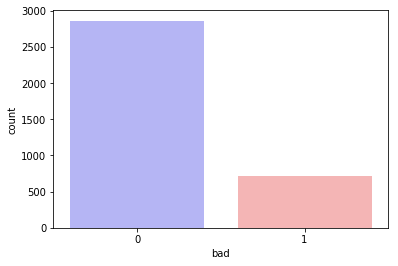

In [35]:
visual.countplot()

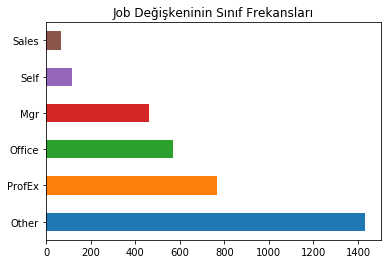

In [36]:
visual.visual()

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


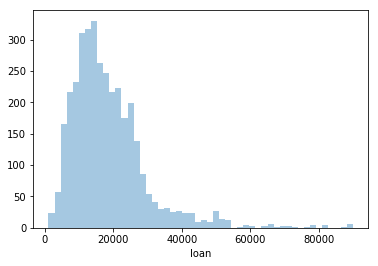

In [37]:
visual.distplot()

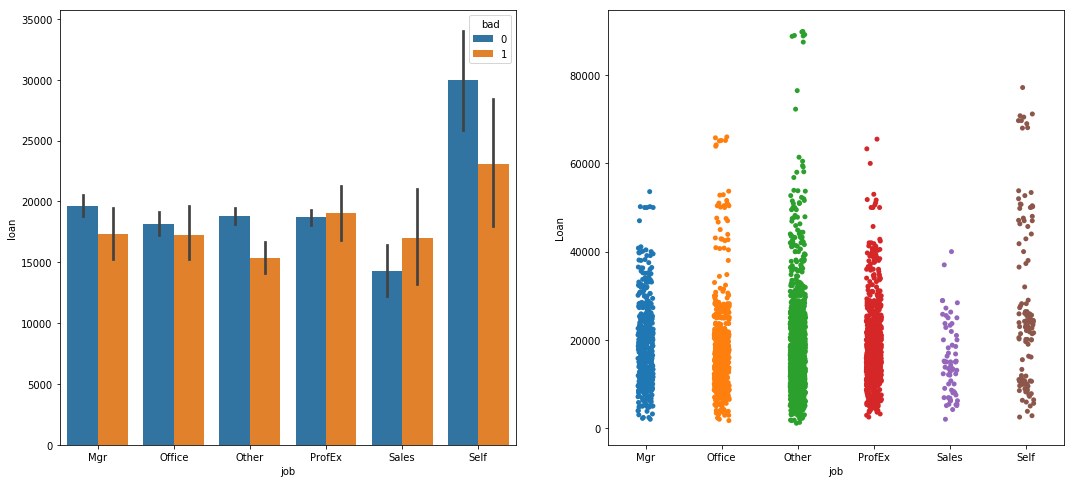

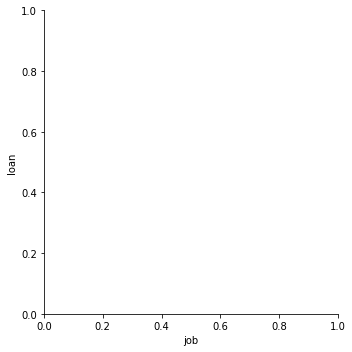

In [38]:
visual.figure()

In [39]:
visual.pivotTable()

reason       DebtCon       HomeImp
bad                               
0       19973.226308  17029.975430
1       19410.000000  12099.590164


# Ön işleme ve Model

In [201]:
pre = PreProcessing(data)

In [202]:
pre.copy_data()

### 1) Logistic Classification

Bu notebook da solver olarak "liblinear" kullanılmıştır.

"loj_work.ipnyb" notebook'unda solver olarak "newton" ve "liblinear" kullanılmış detaylı analiz yapılmıştır.


## Kategorik değişkenler ve eksik gözlemler silinerek model kurma

In [203]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [204]:
pre.onhazirlik()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459


In [205]:
# model 

pre.Log()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        17:00:21   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

*** R square değeri oldukça düşük. mortdue , value , ninq  değişkenleri anlamsız. loan ve yoj ise ufak bir farkla anlamsız gözüküyor.

In [206]:
# sklearn ile model

pre.Sklearn_Log()

In [207]:
pre.Log_predict()

### *** Train ve test olarak ayrılmadan elde edilen doğruluk değeri

In [208]:
pre.acc()

acc :0.9053518334985133


### **** Train ve Test diye ayırmadan elde edilen confusion matrix

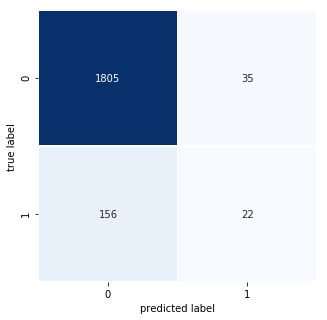

In [209]:
pre.confusion_matrix()

### **** Train ve Test diye ayırmadan elde edilen classfication report

In [210]:
pre.class_report()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1840
           1       0.39      0.12      0.19       178

   micro avg       0.91      0.91      0.91      2018
   macro avg       0.65      0.55      0.57      2018
weighted avg       0.87      0.91      0.88      2018



### **** Train ve Test diye ayırmadan elde edilen AUC-ROC

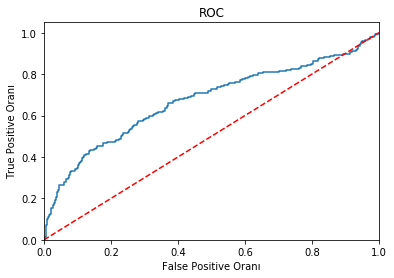

In [211]:
pre.auc_roc()

### Split ederek model

In [212]:
pre.train_test_split()

In [213]:
pre.Sklearn_Log_split()

In [214]:
pre.acc_split()

 test acc : 0.9158415841584159


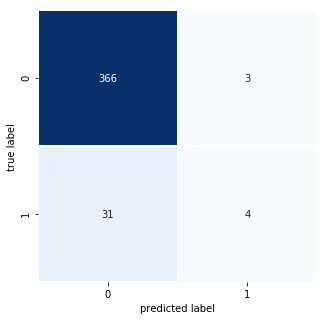

In [215]:
pre.confusion_matrix_split_test()

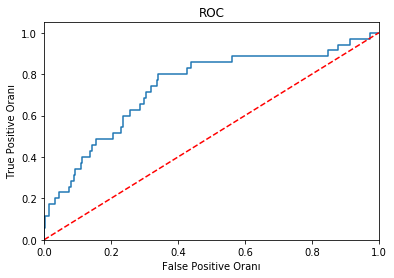

In [216]:
pre.auc_roc_split()

In [217]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



## Anlamsız çıkan değişkenlerin modelden çıkarılması

In [218]:
pre.drop() # drop fonksiyonu ile anlamsız değişkenler çıkarıldı.

,loan,value,derog,delinq,clage,ninq,clno,debtinc
153,18200,136877.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,96784.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,36486.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,76718.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,43684.0,1.0,0.0,95.36,1.0,17.0,27.108


In [219]:
pre.Log()

Optimization terminated successfully.
         Current function value: 0.263730
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2010
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1161
Time:                        17:00:26   Log-Likelihood:                -532.21
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 5.602e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.133e-05   1.02e-05     -3.085      0.002   -5.12e-05   -1.14e-05
value      -3.259e-06   2.39e-06     -1.365      0.172   -7.94e-06    1.42e-06
derog          0.5895      0.121      4.873      0.000       0.352       0.827
delinq         0.7195      0.084      8.545      0.000       0.555       0.885
clage         -0.0094      0.001     -7.245      0.000      -0.012      -0.007
ninq           0.0270      0.046      0.582      0.561      -0.064       0.118
clno          -0.0514      0.011     -4.808      0.000      -0.072      -0.030
debtinc        0.0212      0.007      2.979      0.003       0.007       0.035
==============================================================================
"""

In [220]:
pre.Sklearn_Log()

In [221]:
pre.Log_predict()

In [222]:
pre.acc() 

acc :0.8984142715559961


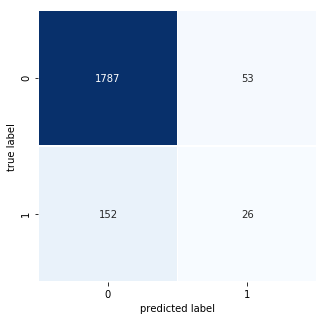

In [223]:
pre.confusion_matrix()

In [224]:
pre.class_report()

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1840
           1       0.33      0.15      0.20       178

   micro avg       0.90      0.90      0.90      2018
   macro avg       0.63      0.56      0.57      2018
weighted avg       0.87      0.90      0.88      2018



## Diğer anlamsız değişkenlerin de çıkarılması

In [225]:
pre.drop2()

,loan,derog,delinq,clage,clno,debtinc
153,18200,0.0,0.0,168.96,26.0,36.056
154,21700,0.0,0.0,64.51,24.0,38.079
155,34100,0.0,2.0,196.01,50.0,42.459
156,8400,0.0,2.0,131.47,22.0,29.200
157,17400,1.0,0.0,95.36,17.0,27.108


In [226]:
pre.Log()

Optimization terminated successfully.
         Current function value: 0.264312
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2012
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.1141
Time:                        17:00:29   Log-Likelihood:                -533.38
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 6.230e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.589e-05    9.7e-06     -3.699      0.000   -5.49e-05   -1.69e-05
derog          0.6152      0.120      5.114      0.000       0.379       0.851
delinq         0.7334      0.084      8.746      0.000       0.569       0.898
clage         -0.0099      0.001     -7.883      0.000      -0.012      -0.007
clno          -0.0546      0.010     -5.230      0.000      -0.075      -0.034
debtinc        0.0192      0.007      2.932      0.003       0.006       0.032
==============================================================================
"""

In [227]:
pre.acc()

acc :0.8984142715559961


## Anlamsız değişkenlerin çıkarılarak gözlemlerin train ve test diye ayrılması ile model

In [228]:
pre.train_test_split()

In [229]:
pre.Sklearn_Log_split()

In [230]:
pre.acc_split()

 test acc : 0.9108910891089109


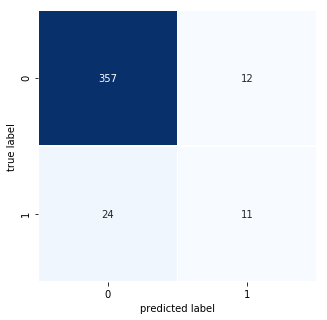

In [231]:
pre.confusion_matrix_split_test()

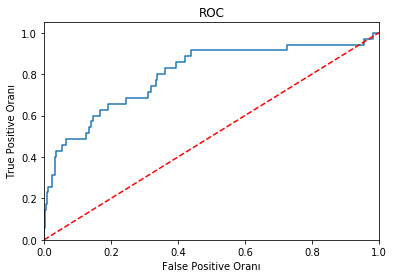

In [232]:
pre.auc_roc_split()

In [233]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       369
           1       0.48      0.31      0.38        35

   micro avg       0.91      0.91      0.91       404
   macro avg       0.71      0.64      0.67       404
weighted avg       0.90      0.91      0.90       404



# Eksik değerlerden kategorik olanları mod ve sürekli değişkenlerden eksik olanları mean ile doldurmak 

# Kategorik değişkenlere dummy yapılması.

# Normalizasyon

In [234]:
data = pd.read_csv('hmelq.csv')

### mortdue , value gibi yüksek değerli değişkenlerin clno gibi değişkenleri baskılamaması için normalizasyon yapacağız.

In [235]:
pre = PreProcessing(data)

### Kategorik ve sürekli değişkenlerden eksik olanları doldurma işlemi

In [236]:
pre.fillna()

 En sık tekrarlanan sebep:DebtCon
 En sık tekrarlanan iş:Other


bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

### Dummies değişkene dönüştürme

In [237]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
0,81200.0,18834.0,108355.0,28.0,0.0,0.0,139.14,0.0,14.0,34.042,0,1,0,0,1,0,0,0
1,12600.0,103960.0,127384.0,2.0,0.0,0.0,129.02,0.0,25.0,34.479,1,0,0,0,1,0,0,0
2,18000.0,46865.0,61266.0,5.0,0.0,0.0,102.59,2.0,9.0,26.354,1,0,0,0,1,0,0,0


### Normalizasyon

In [238]:
pre.normalize()

In [239]:
pre.train_test_split()

In [240]:
pre.Log()

Optimization terminated successfully.
         Current function value: 0.395744
         Iterations 8


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3559
Method:                           MLE   Df Model:                           16
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.2078
Time:                        17:00:36   Log-Likelihood:                -1415.2
converged:                       True   LL-Null:                       -1786.4
                                        LLR p-value:                1.204e-147
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.753e-05   5.14e-06     -3.411      0.001   -2.76e-05   -7.46e-06
mortdue        -5.287e-06   1.95e-06     -2.716      0.007    -9.1e-06   -1.47e-06
value           3.036e-06   1.49e-06      2.033      0.042    1.09e-07    5.96e-06
yoj               -0.0115      0.007     -1.553      0.121      -0.026       0.003
derog              0.4965      0.060      8.235      0.000       0.378       0.615
delinq             0.7567      0.050     15.068      0.000       0.658       0.855
clage             -0.0051      0.001     -7.353      0.000      -0.006      -0.004
ninq               0.1660      0.026      6.321      0.000       0.115       0.218
clno              -0.0127      0.005     -2.331      0.020      -0.023      -0.002
debtinc            0.0602      0.008      7.591      0.000       0.045       0.076
reason_DebtCon    -1.9541        nan        nan        nan         nan         nan
reason_HomeImp    -1.6066        nan        nan        nan         nan         nan
job_Mgr           -0.7501        nan        nan        nan         nan         nan
job_Office        -1.4008        nan        nan        nan         nan         nan
job_Other         -0.7609        nan        nan        nan         nan         nan
job_ProfEx        -0.7497        nan        nan        nan         nan         nan
job_Sales          0.2836        nan        nan        nan         nan         nan
job_Self          -0.1828        nan        nan        nan         nan         nan
==================================================================================
"""

In [241]:
pre.Sklearn_Log_split()

In [242]:
pre.acc_split()

 test acc : 0.7863128491620112


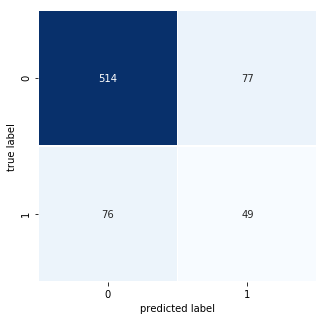

In [243]:
pre.confusion_matrix_split_test()

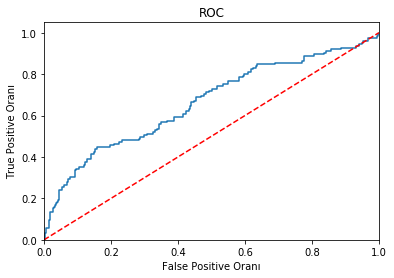

In [244]:
pre.auc_roc_split()

# Sadece kategorik değişkenlerin dummy değişkene dönüştürülmesi ve eksik değerlerin çıkarılması

In [245]:
data = pd.read_csv('hmelq.csv')

In [246]:
pre = PreProcessing(data)

In [247]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [248]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [249]:
pre.train_test_split()

In [250]:
pre.Log()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 9


C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.2346
Time:                        17:00:40   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938        nan        nan        nan         nan         nan
reason_HomeImp    -3.8593        nan        nan        nan         nan         nan
job_Mgr           -1.4722        nan        nan        nan         nan         nan
job_Office        -2.0716        nan        nan        nan         nan         nan
job_Other         -1.5260        nan        nan        nan         nan         nan
job_ProfEx        -1.5377        nan        nan        nan         nan         nan
job_Sales         -0.2487        nan        nan        nan         nan         nan
job_Self          -0.7970        nan        nan        nan         nan         nan
==================================================================================
"""

In [251]:
pre.Sklearn_Log_split()

In [252]:
pre.acc_split()

 test acc : 0.9158415841584159


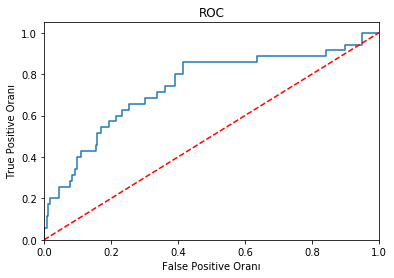

In [253]:
pre.auc_roc_split()

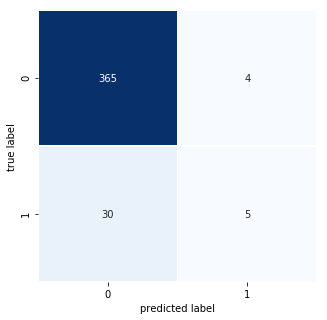

In [254]:
pre.confusion_matrix_split_test()

# 2) SVC

In [255]:
data = pd.read_csv("hmelq.csv")

In [256]:
pre = PreProcessing("data")

### Eksik değerleri silerek kategorik değişkenleri dummy değişkene dönüştürmek

In [257]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [258]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [259]:
pre.train_test_split()

In [260]:
pre.SupportVector()

In [261]:
pre.acc_split()

 test acc : 0.9158415841584159


In [262]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.03      0.06        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.96      0.51      0.51       404
weighted avg       0.92      0.92      0.88       404



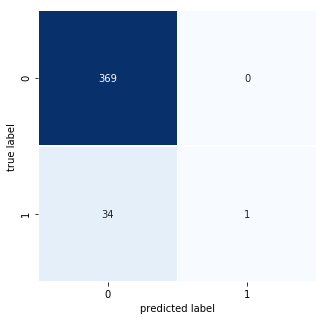

In [263]:
pre.confusion_matrix_split_test()

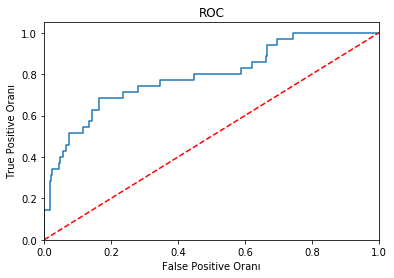

In [264]:
pre.auc_roc_split_SVC()

In [265]:
pre.ModelTuning_SVC()

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.7min finished


En iyi parametreler: {'C': 10}
SVC tuned acc : 0.9183168316831684


In [266]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.06      0.11        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.96      0.53      0.53       404
weighted avg       0.93      0.92      0.88       404



# 3) MLP

In [267]:
data = pd.read_csv('hmelq.csv')
pre = PreProcessing(data)

In [268]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [269]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [270]:
pre.train_test_split()

In [271]:
pre.scale()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [272]:
pre.MLPC()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [273]:
pre.acc_split() # MLP test acc score

 test acc : 0.948019801980198


In [274]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.89      0.46      0.60        35

   micro avg       0.95      0.95      0.95       404
   macro avg       0.92      0.73      0.79       404
weighted avg       0.95      0.95      0.94       404



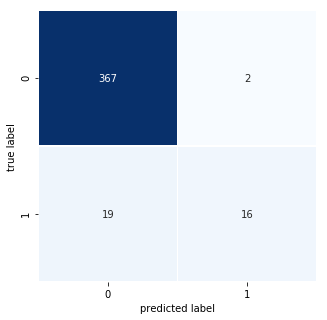

In [275]:
pre.confusion_matrix_split_test()

In [276]:
pre.ModelTuning_MLPC()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.5min finished
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


En iyi parametreler: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
MLPC tuned acc : 0.948019801980198


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [277]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       369
           1       0.85      0.49      0.62        35

   micro avg       0.95      0.95      0.95       404
   macro avg       0.90      0.74      0.80       404
weighted avg       0.94      0.95      0.94       404



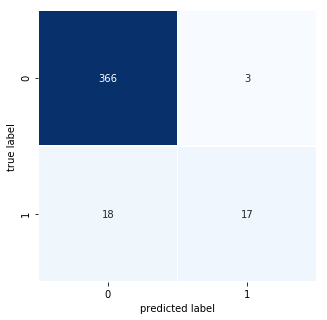

In [278]:
pre.confusion_matrix_split_test()

# 4) CART

In [279]:
data = pd.read_csv('hmelq.csv')
pre = PreProcessing(data)

In [280]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [281]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [282]:
pre.train_test_split()

In [283]:
pre.CART()

In [284]:
pre.acc_split()

 test acc : 0.9331683168316832


In [285]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       369
           1       0.67      0.46      0.54        35

   micro avg       0.93      0.93      0.93       404
   macro avg       0.81      0.72      0.75       404
weighted avg       0.93      0.93      0.93       404



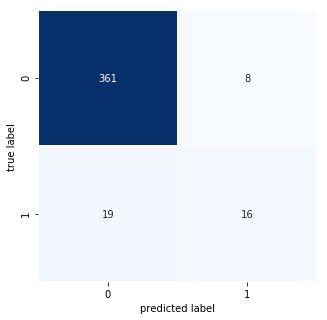

In [286]:
pre.confusion_matrix_split_test()

In [287]:
pre.ModelTuning_CART()

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


En iyi parametreler: {'max_depth': 5, 'min_samples_split': 2}
CART tuned acc : 0.9405940594059405


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.3s finished


In [288]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       0.92      0.34      0.50        35

   micro avg       0.94      0.94      0.94       404
   macro avg       0.93      0.67      0.73       404
weighted avg       0.94      0.94      0.93       404



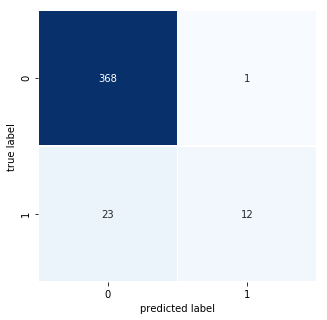

In [289]:
pre.confusion_matrix_split_test()

# 5) RANDOM FORESTS

In [290]:
data = pd.read_csv('hmelq.csv')
pre = PreProcessing(data)

In [291]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [292]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [293]:
pre.train_test_split()

In [294]:
pre.RF()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [295]:
pre.acc_split()

 test acc : 0.943069306930693


In [296]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       1.00      0.34      0.51        35

   micro avg       0.94      0.94      0.94       404
   macro avg       0.97      0.67      0.74       404
weighted avg       0.95      0.94      0.93       404



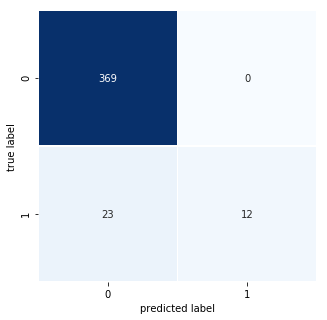

In [297]:
pre.confusion_matrix_split_test()

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.2min finished


En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}
RF tuned acc : 0.9405940594059405


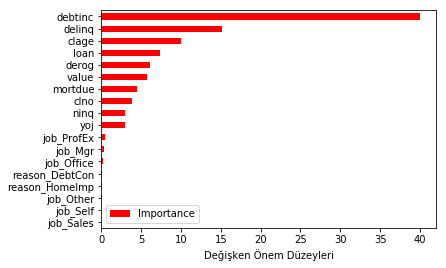

In [298]:
pre.ModelTuning_RF()

### Grafikten önemli olduğu anlaşılan değişkenler daha sonra kurulacak modeller de kullanılabilir.

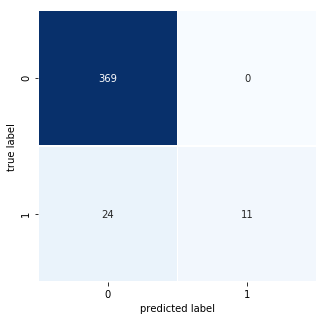

In [299]:
pre.confusion_matrix_split_test()

In [300]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       1.00      0.31      0.48        35

   micro avg       0.94      0.94      0.94       404
   macro avg       0.97      0.66      0.72       404
weighted avg       0.94      0.94      0.93       404



# 6) GRADIENT BOOST

In [301]:
data = pd.read_csv('hmelq.csv')
pre = PreProcessing(data)

In [302]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [303]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [304]:
pre.train_test_split()

In [305]:
pre.gradientboost()

In [306]:
pre.acc_split()

 test acc : 0.9455445544554455


In [307]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.93      0.40      0.56        35

   micro avg       0.95      0.95      0.95       404
   macro avg       0.94      0.70      0.77       404
weighted avg       0.94      0.95      0.94       404



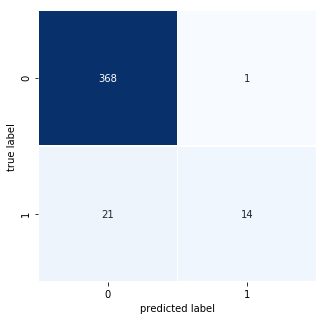

In [308]:
pre.confusion_matrix_split_test()

In [309]:
pre.ModelTuning_gradientboost()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.5min finished


GBM tuned acc : 0.9529702970297029


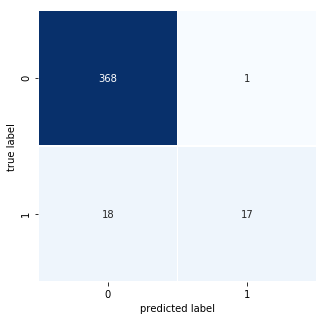

In [310]:
pre.confusion_matrix_split_test()

In [311]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.94      0.49      0.64        35

   micro avg       0.95      0.95      0.95       404
   macro avg       0.95      0.74      0.81       404
weighted avg       0.95      0.95      0.95       404



# 7) KNN

In [312]:
data = pd.read_csv('hmelq.csv')
pre = PreProcessing(data)

In [313]:
pre.dropNa()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [314]:
pre.dummies()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0


In [315]:
pre.train_test_split()

In [316]:
pre.KNN()

In [317]:
pre.acc_split()

 test acc : 0.9158415841584159


In [318]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       369
           1       0.57      0.11      0.19        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.75      0.55      0.57       404
weighted avg       0.89      0.92      0.89       404



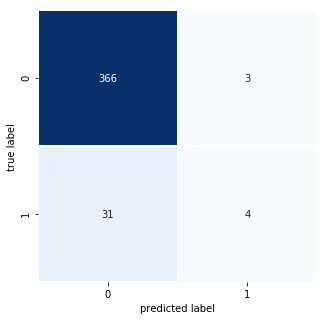

In [319]:
pre.confusion_matrix_split_test()

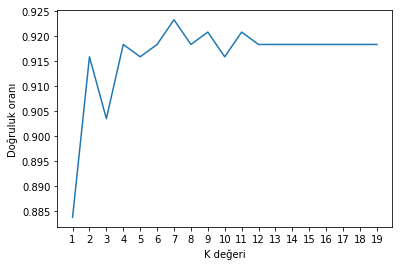

Maximum KNN Score is 92.33%
En iyi skor:0.9138785625774474
En iyi parametreler: {'n_neighbors': 14}
KNN tuned acc : 0.9183168316831684


In [320]:
pre.ModelTuning_KNN()

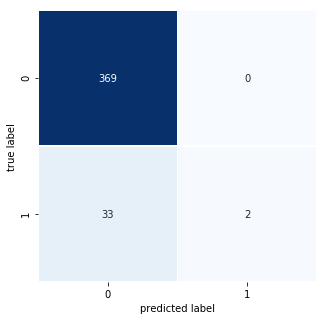

In [321]:
pre.confusion_matrix_split_test()

In [322]:
pre.class_report_split()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       1.00      0.06      0.11        35

   micro avg       0.92      0.92      0.92       404
   macro avg       0.96      0.53      0.53       404
weighted avg       0.93      0.92      0.88       404

